# Adaboost Practice

In this notebook there is implementation of Adaboost from scratch and other practice and experiments related to Adaboost model

In [1]:
%load_ext autoreload
%autoreload 2

from mlpeople.models.ensemble import AdaBoost

# Very Simple Learning Example - Smoke Test

Here small dataset is generated and all process is checked step by step to make sure implemented AdaBoost class works properly.

Stump 1
 Feature: 0
 Threshold: 1.5
 Alpha: 0.8047189562170503

Stump 2
 Feature: 0
 Threshold: 3.0
 Alpha: 1.0986122886681098

Stump 3
 Feature: 1
 Threshold: 2.0
 Alpha: 1.416606672028108



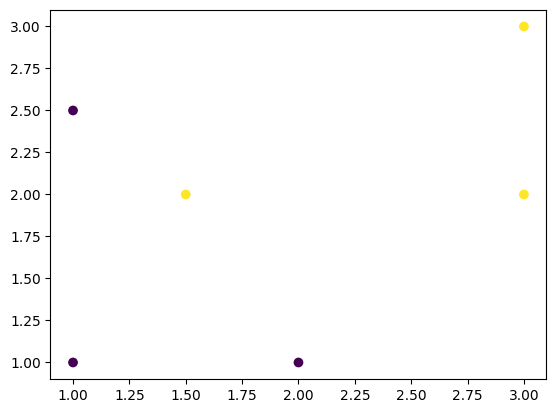

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Tiny dataset
X_smoke1 = np.array([
    [1,1],
    [2,1],
    [1,2.5],
    [1.5,2],
    [3,3],
    [3,2]
])

y_smoke1 = np.array([-1, -1, -1, 1, 1, 1])

# Train AdaBoost
adab_clf_smoke1 = AdaBoost(n_clf=3)
adab_clf_smoke1.fit(X_smoke1, y_smoke1)

# Print learned stumps
for i, stump in enumerate(adab_clf_smoke1.clfs):
    print(f"Stump {i+1}")
    print(" Feature:", stump.feature_index)
    print(" Threshold:", stump.threshold)
    print(" Alpha:", stump.alpha)
    print()

plt.scatter(X_smoke1[:, 0], X_smoke1[:, 1], c=y_smoke1);

## Visualizations

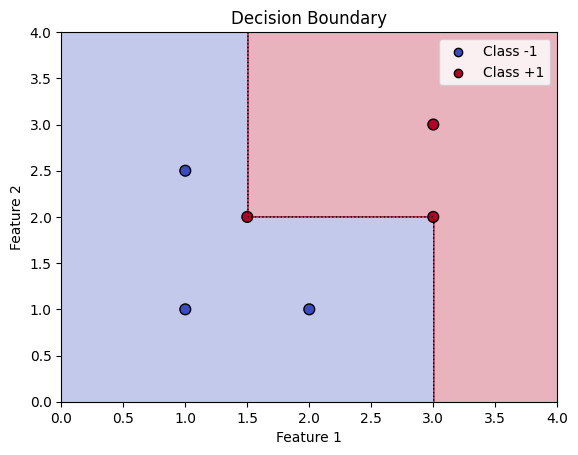

In [3]:
from mlpeople.models.ensemble.visualization import plot_decision_boundary, plot_boosting_stages

plot_decision_boundary(adab_clf_smoke1, X_smoke1, y_smoke1)

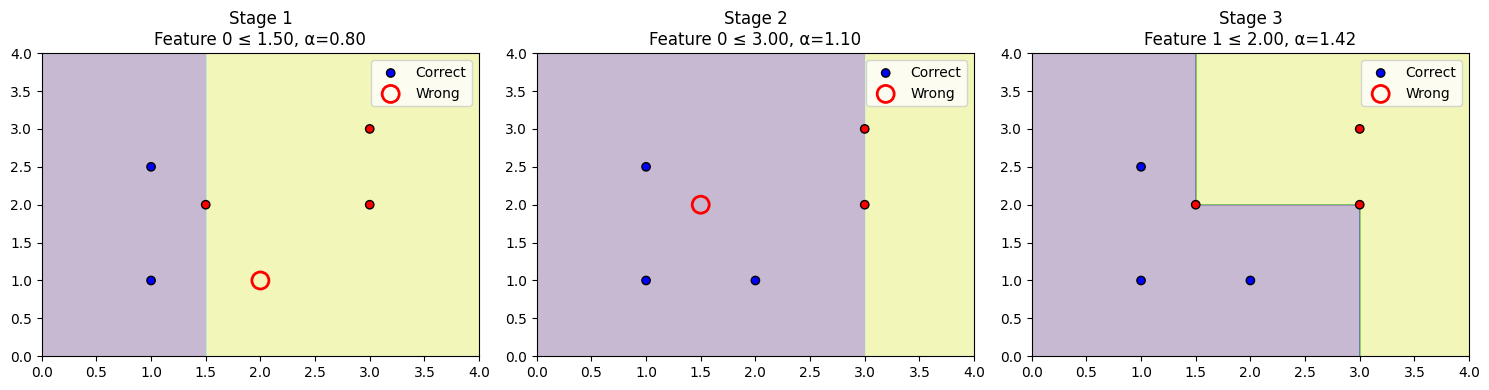

In [4]:
plot_boosting_stages(adab_clf_smoke1, X_smoke1, y_smoke1)

## Test sample - Smoke Test

Here there is small test sample and its prediction process details printed

In [5]:
X_test_smoke1 = np.array([
    [2.5,1.5],
    [2.5,2.5],
    [3.5,1.5],
])

print("=" * 50)
print("AdaBoost Stage-by-Stage Prediction Analysis")
print("alpha_N - learner weight (confidence)")
print("h_N(x) - weak learner prediction (-1 / +1)")
print("alpha_N * h_N(x) - weighted contribution")
print("=" * 50)

F = np.zeros(X_test_smoke1.shape[0])

for t, stump in enumerate(adab_clf_smoke1.clfs, start=1):

    h_t = stump.predict(X_test_smoke1) # weak learner prediction (-1 / +1)
    alpha_t = stump.alpha              # learner weight (confidence)

    contribution = alpha_t * h_t       # weighted contribution
    F += contribution                  # update margin

    print(f"\n--- Stage {t} ---")
    print(f"alpha_{t}: {alpha_t:.4f}")
    print(f"h_{t}(x): {h_t}")
    print(f"alpha_{t} * h_{t}(x): {contribution}")
    print(f"Cumulative margin F(x): {F}")

print("\n" + "=" * 50)
print("Final Results")
print("=" * 50)

print("Final margin F(x):", F)
print("Final prediction sign(F(x)):", np.sign(F))


AdaBoost Stage-by-Stage Prediction Analysis
alpha_N - learner weight (confidence)
h_N(x) - weak learner prediction (-1 / +1)
alpha_N * h_N(x) - weighted contribution

--- Stage 1 ---
alpha_1: 0.8047
h_1(x): [1. 1. 1.]
alpha_1 * h_1(x): [0.80471896 0.80471896 0.80471896]
Cumulative margin F(x): [0.80471896 0.80471896 0.80471896]

--- Stage 2 ---
alpha_2: 1.0986
h_2(x): [-1. -1.  1.]
alpha_2 * h_2(x): [-1.09861229 -1.09861229  1.09861229]
Cumulative margin F(x): [-0.29389333 -0.29389333  1.90333124]

--- Stage 3 ---
alpha_3: 1.4166
h_3(x): [-1.  1. -1.]
alpha_3 * h_3(x): [-1.41660667  1.41660667 -1.41660667]
Cumulative margin F(x): [-1.7105      1.12271334  0.48672457]

Final Results
Final margin F(x): [-1.7105      1.12271334  0.48672457]
Final prediction sign(F(x)): [-1.  1.  1.]


# Example 2 - Early stopping

Here, we use a slightly larger dataset, but it is still small enough to be useful for learning and for checking all the steps of the AdaBoost flow.

We can see that even with a small amount of data (10 rows), AdaBoost may take up to 15 steps to fit a non-linear classification problem. Adding more steps does not always improve performance. This suggests that implementing an early stopping mechanism when the error becomes sufficiently low could be a good idea.

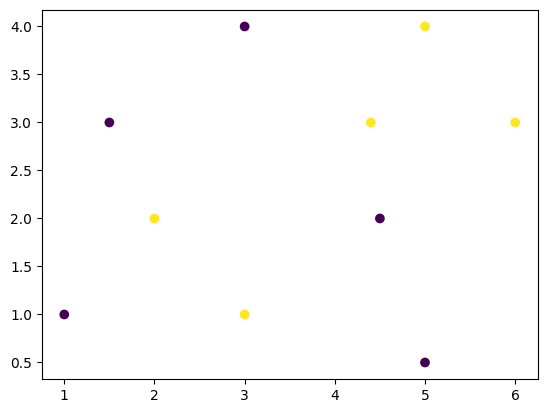

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Tiny dataset
X_smoke2 = np.array([
    [1,1],
    [1.5,3],
    [3,4],
    [4.5,2],
    [5,0.5],
    [2,2],
    [3,1],
    [4.4,3],
    [5,4],
    [6,3]
])

y_smoke2 = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])

plt.scatter(X_smoke2[:, 0], X_smoke2[:, 1], c=y_smoke2);

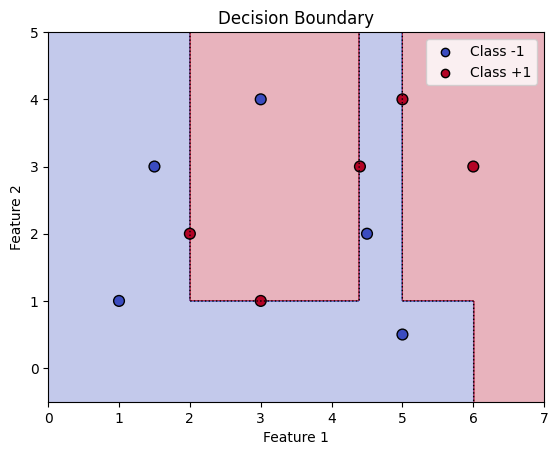

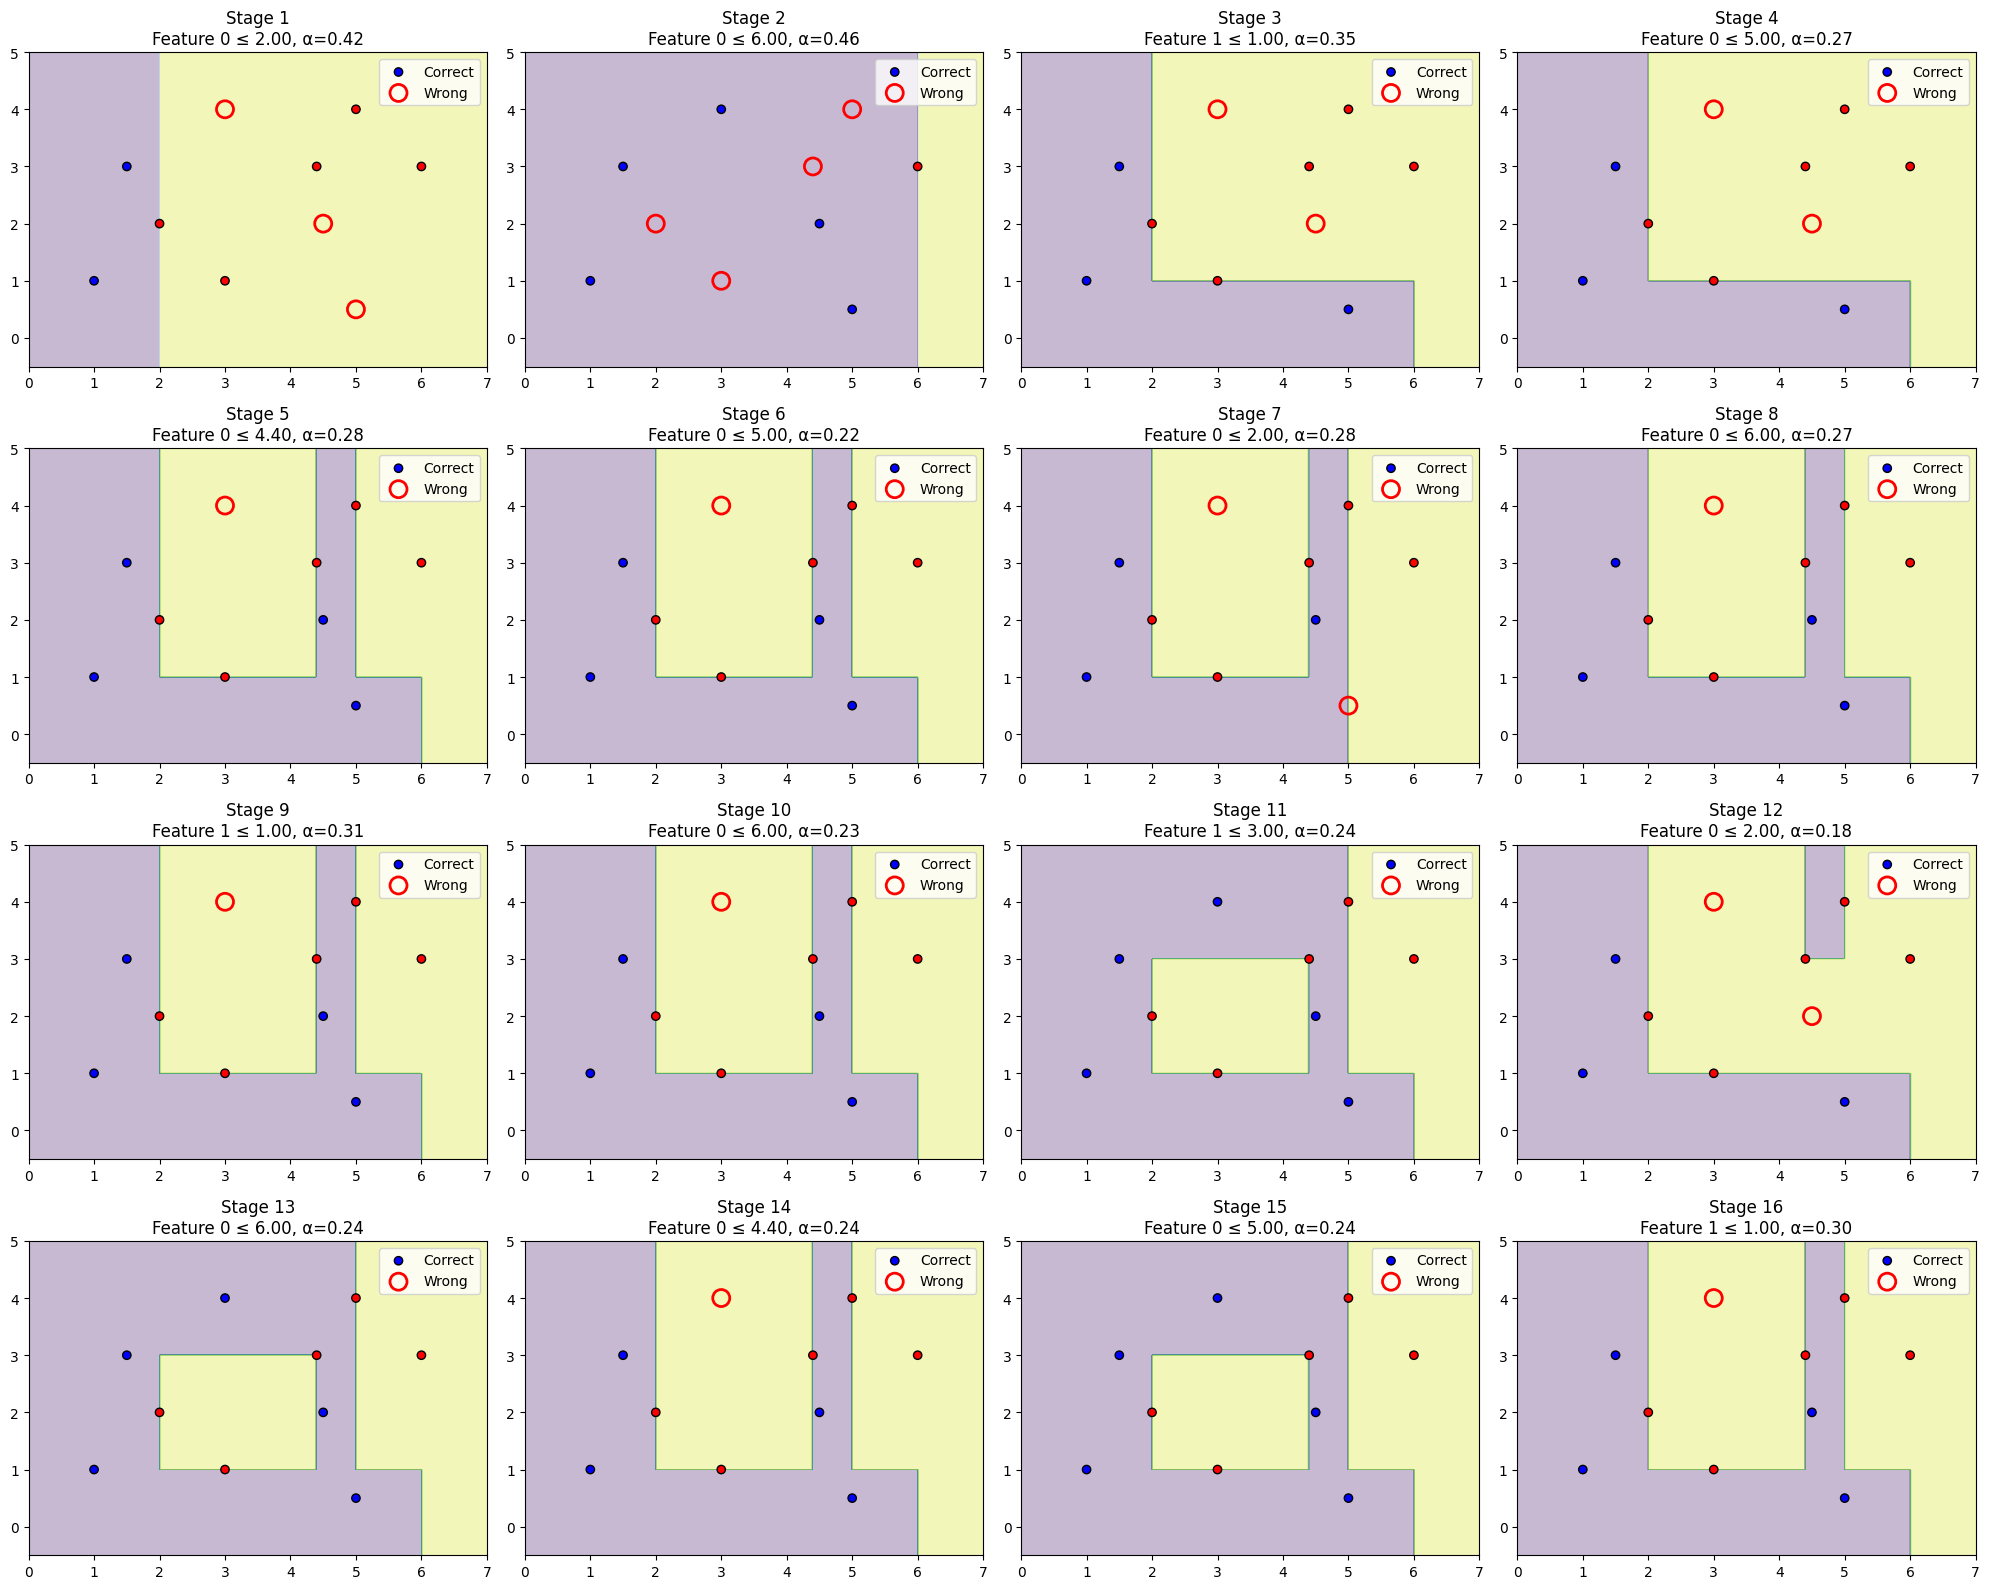

In [7]:
# Train AdaBoost
adab_clf_smoke2 = AdaBoost(n_clf=16)
adab_clf_smoke2.fit(X_smoke2, y_smoke2)

# decision boundary
plot_decision_boundary(adab_clf_smoke2, X_smoke2, y_smoke2)

# boost steps
plot_boosting_stages(adab_clf_smoke2, X_smoke2, y_smoke2)

Early stopping at stage 11, ensemble error=0.000000


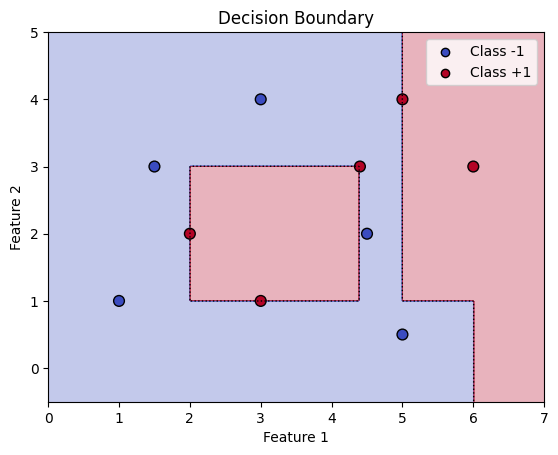

In [8]:
# Train AdaBoost
adab_clf_smoke2_es = AdaBoost(n_clf=16, early_stopping=True)
adab_clf_smoke2_es.fit(X_smoke2, y_smoke2)

# decision boundary
plot_decision_boundary(adab_clf_smoke2_es, X_smoke2, y_smoke2)

# 2D Dataset with sklearn make_classification

Here dataset of 300 points is generated with sklearn.datasets.make_classification method

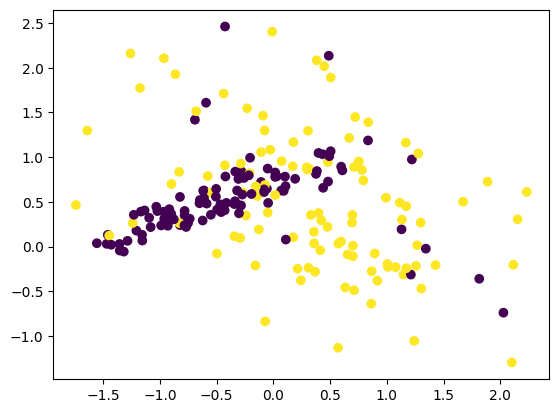

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X_skl, y_skl = make_classification(
    n_samples=300,        # total samples
    n_features=2,         # 2 features for easy visualization
    n_redundant=0,        # no redundant features
    n_clusters_per_class=1,
    flip_y=0.2,           # 20% label noise
    class_sep=0.5,       # how separable the classes are
    random_state=42
)

# Convert labels from {0,1} to {-1,1} for AdaBoost
y_skl = np.where(y_skl == 0, -1, 1)

# Split into train and test
X_skl_train, X_skl_test, y_skl_train, y_skl_test = train_test_split(X_skl, y_skl, test_size=0.3, random_state=42)

plt.scatter(X_skl_train[:, 0], X_skl_train[:, 1], c=y_skl_train);

In [10]:
# Train AdaBoost with 30 weak learners
clf_skl = AdaBoost(n_clf=30)
clf_skl.fit(X_skl_train, y_skl_train)

# Predict on test set
y_skl_pred = clf_skl.predict(X_skl_test)
print("Test Accuracy:", accuracy_score(y_skl_test, y_skl_pred))

Test Accuracy: 0.8444444444444444


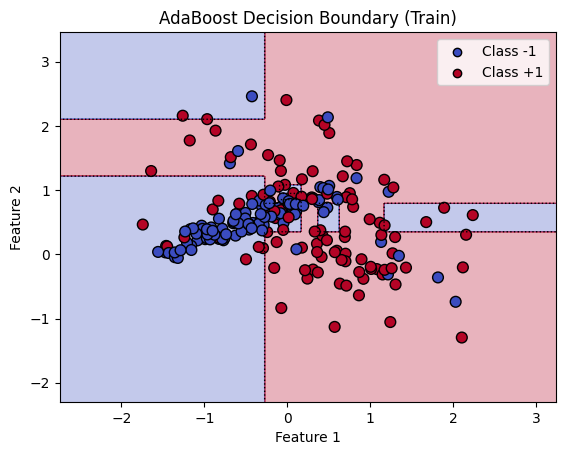

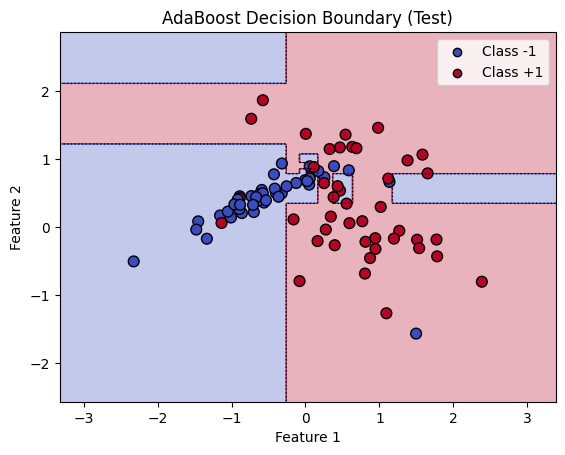

In [11]:
plot_decision_boundary(clf_skl, X_skl_train, y_skl_train, title="AdaBoost Decision Boundary (Train)")
plot_decision_boundary(clf_skl, X_skl_test, y_skl_test, title="AdaBoost Decision Boundary (Test)")

# Binary classification

Here dataset with 400 points for binary classification generate with customly implmented generate_logistic_regression_data method

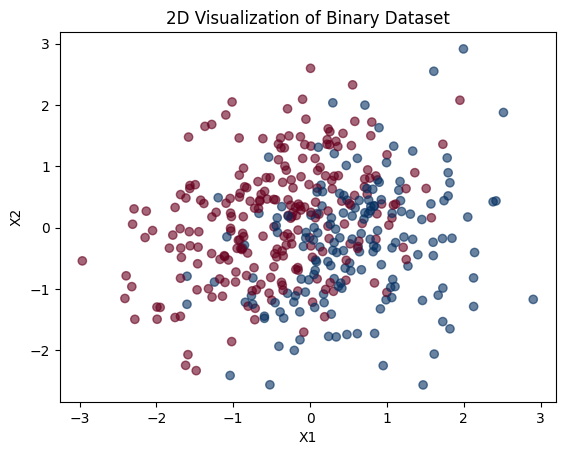

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from mlpeople.models.logistic import generate_logistic_regression_data

X_bin, y_bin, _ = generate_logistic_regression_data(
    n=400,
    p=2,
    intercept=-0.5,
    coefs=[2, -1],
    seed=42,
    sigma=2,
)

# replace 0 to -1 for adaboost
y_bin = np.where(y_bin == 0, -1, 1)

plt.scatter(
    X_bin[:, 0],
    X_bin[:, 1],
    c=y_bin,
    alpha=0.6,
    cmap="RdBu"
)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("2D Visualization of Binary Dataset")

plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# Train AdaBoost with 50 weak learners
clf_bin = AdaBoost(n_clf=50)
clf_bin.fit(X_bin_train, y_bin_train)

# Predict on test set
y_pred = clf_bin.predict(X_bin_test)
print("Test Accuracy:", accuracy_score(y_bin_test, y_pred))

Test Accuracy: 0.7375


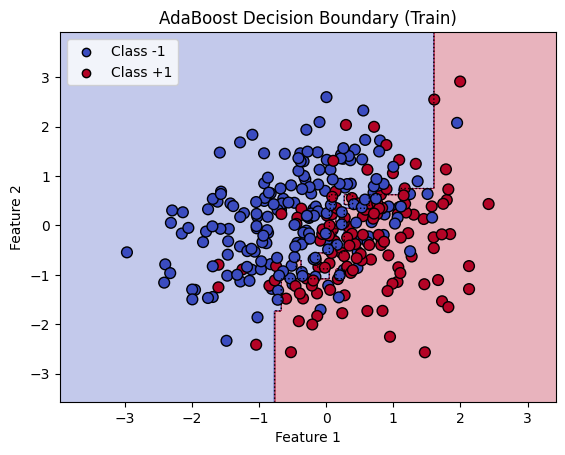

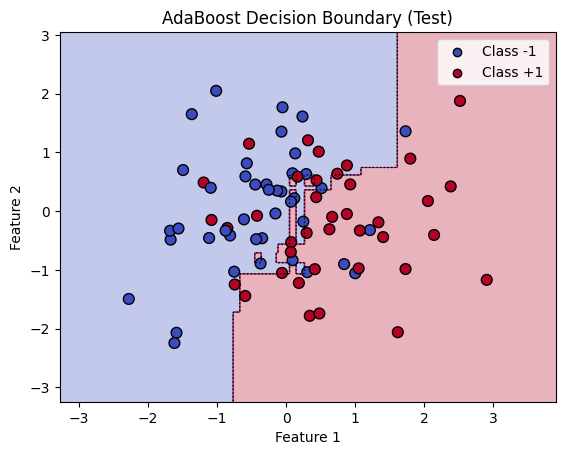

In [14]:
plot_decision_boundary(clf_bin, X_bin_train, y_bin_train, title="AdaBoost Decision Boundary (Train)")
plot_decision_boundary(clf_bin, X_bin_test, y_bin_test, title="AdaBoost Decision Boundary (Test)")

# Diabetes dataset Examples

Here we use Adaboost class with diabetes dataset

In [15]:
import pandas as pd

raw_diabetes_df = pd.read_csv('data/diabetes.csv')

raw_diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
diabetes_df = raw_diabetes_df[
    (raw_diabetes_df[["Glucose", "Age", "BMI"]] != 0).all(axis=1)
]

X_age = diabetes_df[['Glucose', 'Age']]
X_bmi = diabetes_df[['Glucose', 'BMI']]
y = diabetes_df['Outcome']

In [17]:
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y, test_size=0.3, stratify=y, random_state=42)
X_bmi_train, X_bmi_test, y_bmi_train, y_bmi_test = train_test_split(X_bmi, y, test_size=0.3, stratify=y, random_state=42)

## Age and Glucose

In [18]:
X_age_train_np = X_age_train.to_numpy()
X_age_test_np  = X_age_test.to_numpy()

# Convert labels to {-1,1} (our AdaBoost expects -1/+1)
y_age_train_np = np.where(y_age_train.to_numpy() == 0, -1, 1)
y_age_test_np  = np.where(y_age_test.to_numpy() == 0, -1, 1)

# Train AdaBoost
clf = AdaBoost(n_clf=70)
clf.fit(X_age_train_np, y_age_train_np)

# Predict
y_pred = clf.predict(X_age_test_np)
print("Test Accuracy:", accuracy_score(y_age_test_np, y_pred))

Test Accuracy: 0.7256637168141593


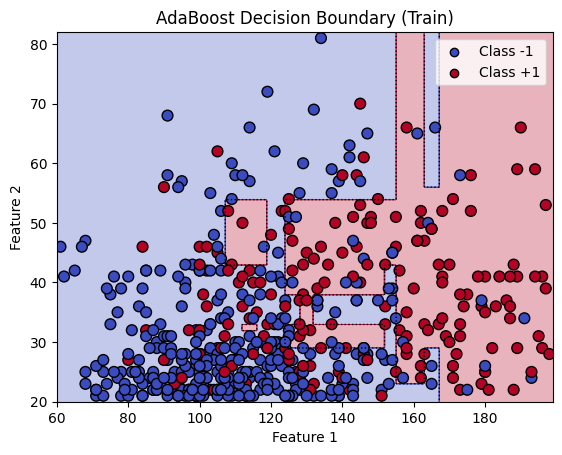

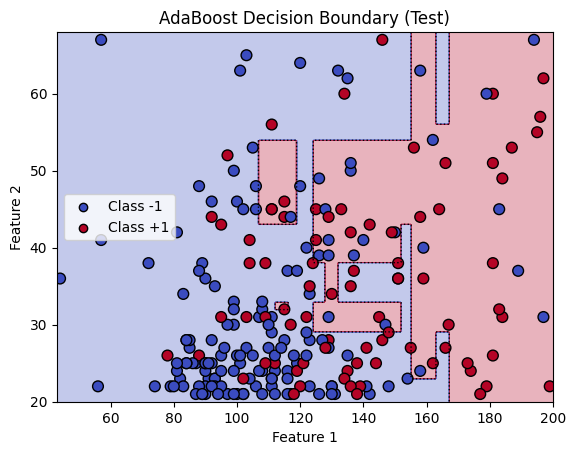

In [19]:
plot_decision_boundary(clf, X_age_train_np, y_age_train_np, title="AdaBoost Decision Boundary (Train)")
plot_decision_boundary(clf, X_age_test_np, y_age_test_np, title="AdaBoost Decision Boundary (Test)")

## BMI and Glucose

In [20]:
X_bmi_train_np = X_bmi_train.to_numpy()
X_bmi_test_np  = X_bmi_test.to_numpy()

# Convert labels to {-1,1} (our AdaBoost expects -1/+1)
y_bmi_train_np = np.where(y_bmi_train.to_numpy() == 0, -1, 1)
y_bmi_test_np  = np.where(y_bmi_test.to_numpy() == 0, -1, 1)

# Train AdaBoost - n_clf=7 is optimal for this case
clf_50 = AdaBoost(n_clf=50)
clf_7 = AdaBoost(n_clf=7)
clf_50.fit(X_bmi_train_np, y_bmi_train_np)
clf_7.fit(X_bmi_train_np, y_bmi_train_np)

# Predict
y_pred_7 = clf_7.predict(X_bmi_test_np)
y_pred_50 = clf_50.predict(X_bmi_test_np)
print("Test Accuracy with 7 stump:", accuracy_score(y_bmi_test_np, y_pred_7))
print("Test Accuracy with 50 stump:", accuracy_score(y_bmi_test_np, y_pred_50))

Test Accuracy with 7 stump: 0.7433628318584071
Test Accuracy with 50 stump: 0.7035398230088495


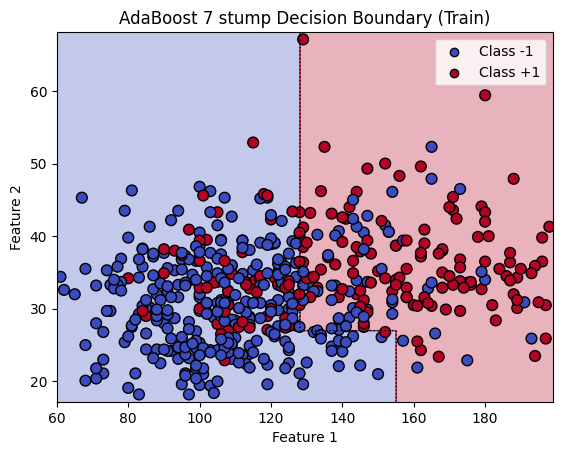

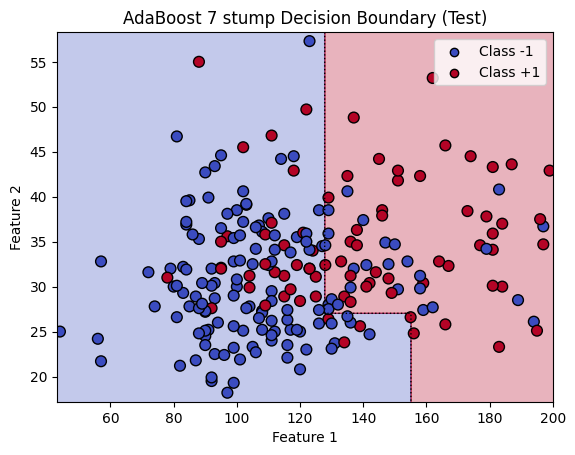

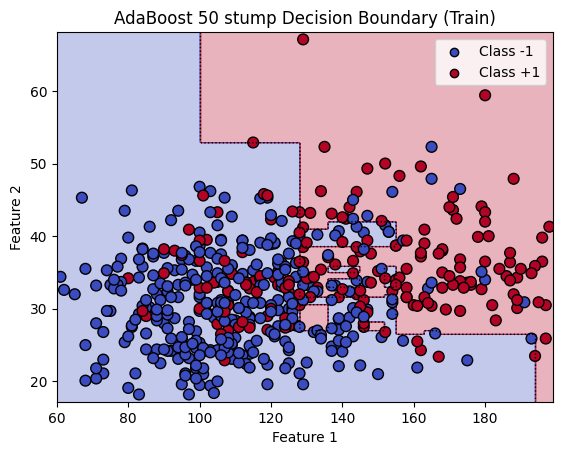

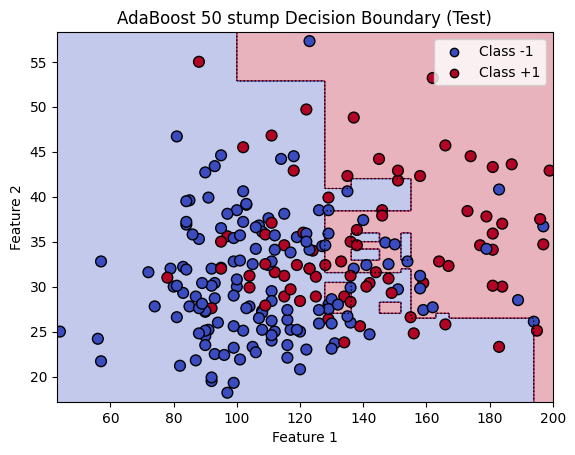

In [21]:
plot_decision_boundary(clf_7, X_bmi_train_np, y_bmi_train_np, title="AdaBoost 7 stump Decision Boundary (Train)")
plot_decision_boundary(clf_7, X_bmi_test_np, y_bmi_test_np, title="AdaBoost 7 stump Decision Boundary (Test)")
plot_decision_boundary(clf_50, X_bmi_train_np, y_bmi_train_np, title="AdaBoost 50 stump Decision Boundary (Train)")
plot_decision_boundary(clf_50, X_bmi_test_np, y_bmi_test_np, title="AdaBoost 50 stump Decision Boundary (Test)")